#  **SHOPRITE** **STORE** **SEGMENTATION**





In [ ]:
## LOAD LIBRARIES

In [ ]:
import numpy as np # numeric computing, linear algebra
import pandas as pd # data preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import random

from subprocess import check_output

%matplotlib inline

In [ ]:
## LOAD DATA

In [ ]:
store = pd.read_csv('./historic_sales_data.csv') # error_bad_lines=False
item = pd.read_csv('./item.csv')

In [ ]:
print(store.head())

   day  month  year  shop_id  item_id  item_price  item_cnt_day
0   22     11  2018       52  1003734        1300             1
1   24     11  2018       52  1003734        1300             1
2   28     11  2018       52  1003734        1300             1
3    1     11  2018       52  1003743         400             1
4   20     11  2018       52  1003743         400             1


In [ ]:
print(item.head())

   item_id  item_category_id
0  1000000                80
1  1000001               152
2  1000002                80
3  1000003                80
4  1000004                80


In [ ]:
# Lets combine this two tables first, and create one table (Inner join on item_id)

In [ ]:
final_store = pd.merge(store, item, on='item_id')

In [ ]:
final_store.tail()

,day,month,year,shop_id,item_id,item_price,item_cnt_day,item_category_id
2664547,18,10,2018,110,1019326,68,1,156
2664548,14,10,2018,110,1019388,64,1,62
2664549,12,10,2018,108,1009849,14,1,80
2664550,15,10,2018,108,1016782,23,1,132
2664551,19,10,2018,118,1017732,99,1,56


# EXPLORE AND ANALYSE THE DATASET

In [ ]:
# DATA DESCRIPTION

final_store.shape # there are 2 664 552 rows and 8 columns

(2664552, 8)

In [ ]:
# lets look for missing values

final_store.isna().sum() # Perfect no missing values

day                 0
month               0
year                0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

In [ ]:
print(final_store.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664552 entries, 0 to 2664551
Data columns (total 8 columns):
 #   Column            Dtype
---  ------            -----
 0   day               int64
 1   month             int64
 2   year              int64
 3   shop_id           int64
 4   item_id           int64
 5   item_price        int64
 6   item_cnt_day      int64
 7   item_category_id  int64
dtypes: int64(8)
memory usage: 183.0 MB
None


In [ ]:
print(final_store.describe())

                day         month  ...  item_cnt_day  item_category_id
count  2.664552e+06  2.664552e+06  ...  2.664552e+06      2.664552e+06
mean   1.585433e+01  6.071994e+00  ...  1.242583e+00      7.969388e+01
std    8.933418e+00  3.638931e+00  ...  2.201286e+00      3.391677e+01
min    1.000000e+00  1.000000e+00  ... -2.200000e+01      0.000000e+00
25%    8.000000e+00  3.000000e+00  ...  1.000000e+00      5.600000e+01
50%    1.600000e+01  6.000000e+00  ...  1.000000e+00      8.000000e+01
75%    2.400000e+01  9.000000e+00  ...  1.000000e+00      1.100000e+02
max    3.100000e+01  1.200000e+01  ...  1.000000e+03      1.660000e+02

[8 rows x 8 columns]


In [ ]:
# item price that start with a negative "-"?
final_store[['item_price', 'item_cnt_day']].describe()

,item_price,item_cnt_day
count,2.664552e+06,2.664552e+06
mean,4.371222e+02,1.242583e+00
std,8.507159e+02,2.201286e+00
min,-1.000000e+00,-2.200000e+01
25%,1.250000e+02,1.000000e+00
50%,2.000000e+02,1.000000e+00
75%,4.800000e+02,1.000000e+00
max,1.539900e+05,1.000000e+03


##### We can see that the item count day and item prices have negative values
##### This could mean we may have some return transactions in our data, As out goal is store segmetation,
##### it is important that this rows are removed

### Lets take a look whether there are records where both negatoives values appear or if the one is zero and the other negative

In [ ]:
print('Check if we have negative quantity and prices at same row:',
     'No' if final_store[(final_store.item_cnt_day<0) & (final_store.item_price<0)].shape[0] == 0 else 'Yes', '\n')

print('Check how many rows we have where quantity is negative',
      'and prices is 0 or vice-versa:', final_store[(final_store.item_cnt_day<=0) & (final_store.item_price<=0)].shape[0], '\n')

print("Check how many rows for price item with negatives values for item price: ",
      final_store[final_store.item_price<=0].shape[0], '\n') # 2938

print("Check how many rows for item_cnt_day with negatives values for item price: ",
      final_store[final_store.item_cnt_day<=0].shape[0], '\n') # 6719

Check if we have negative quantity and prices at same row: No 

Check how many rows we have where quantity is negative and prices is 0 or vice-versa: 0 

Check how many rows for price item with negatives values for item price:  2938 

Check how many rows for item_cnt_day with negatives values for item price:  6718 



In [ ]:
# Which store has negative item_cnt_day
print('Which store id\'s has negative prices \n', 
      final_store.loc[final_store['item_price']<=0, ['shop_id']].value_counts().sort_values(ascending=False)[:5]) 
n = '\n'
print(n)

print('Which store id\'s has negative quantity \n', 
      final_store.loc[final_store['item_cnt_day']<=0, ['shop_id']].value_counts().sort_values(ascending=False)[:5])

print(n)

print('It look like store 50 and 108 appear on both side')

Which store id's has negative prices 
 shop_id
50         184
62         173
84         162
112        157
108        157
dtype: int64


Which store id's has negative quantity 
 shop_id
62         412
24         395
108        356
114        287
50         275
dtype: int64


It look like store 50 and 108 appear on both side


 #### Lets see example of negative or zero rows for price and quantity

In [ ]:
print(final_store[final_store.item_price<=0][:5])

print(n)

print(final_store[final_store.item_cnt_day<=0][:5])

        day  month  year  ...  item_price  item_cnt_day  item_category_id
486903   10      8  2018  ...           0             1                82
819405   19      6  2018  ...           0             1               126
819406   15      6  2018  ...           0             1               126
819407    1      6  2018  ...           0             1               126
819408   22      6  2018  ...           0             4               126

[5 rows x 8 columns]


     day  month  year  ...  item_price  item_cnt_day  item_category_id
68     1      4  2019  ...        1300            -1                46
172   18      6  2019  ...        1300            -1                46
350    6     10  2019  ...        1400            -1                46
513   29     11  2018  ...        1300            -1                46
518    5     11  2018  ...        1300            -4                46

[5 rows x 8 columns]


# A CHALLENGES SO FAR WITH THE DATA:

## if negative prices and quantity, represent returned items, then why we cannot find both negative/zero values for both prices and quatity on the same row/register

In [ ]:
### Lets remove the rows with negative of zero for price and quantity column

final_store = final_store[~(final_store.item_price<=0)]
print("The total number rows for item_price column with negatives values: ", final_store[final_store.item_price<=0].shape[0])
print(n)

final_store = final_store[~(final_store.item_cnt_day<=0)]
print("The total number rows for item_cnt_day column with negatives values: ", final_store[final_store.item_price<=0].shape[0])

print(n)
print(f"We lost {2664552 - final_store.shape[0]} number of rows") 

The total number rows for item_price column with negatives values:  0


The total number rows for item_cnt_day column with negatives values:  0


We lost 9656 number of rows


##### Alternatices for replacing error values or mssing values
###### 1. Use the sklearn impute, to replace the missing or error values
###### 2. Use the mean/meadin or KNN algorithms to replace the values
###### 3. Understand the data source and see if we can understand why this values are missing or have errors

In [ ]:
# Lets confirm
final_store.describe() # no negative value

,day,month,year,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.654896e+06,2.654896e+06,2.654896e+06,2.654896e+06,2.654896e+06,2.654896e+06,2.654896e+06,2.654896e+06
mean,1.585716e+01,6.072164e+00,2.018653e+03,6.612170e+01,1.010176e+06,4.369489e+02,1.248229e+00,7.967166e+01
std,8.934301e+00,3.640559e+00,6.948676e-01,3.245235e+01,6.332837e+03,8.501558e+02,2.202070e+00,3.389516e+01
min,1.000000e+00,1.000000e+00,2.018000e+03,0.000000e+00,1.000000e+06,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.000000e+00,3.000000e+00,2.018000e+03,4.400000e+01,1.004445e+06,1.250000e+02,1.000000e+00,5.600000e+01
50%,1.600000e+01,6.000000e+00,2.019000e+03,6.200000e+01,1.009146e+06,2.000000e+02,1.000000e+00,8.000000e+01
75%,2.400000e+01,9.000000e+00,2.019000e+03,9.400000e+01,1.015703e+06,4.800000e+02,1.000000e+00,1.100000e+02
max,3.100000e+01,1.200000e+01,2.020000e+03,1.180000e+02,1.022169e+06,1.539900e+05,1.000000e+03,1.660000e+02


In [ ]:
# Lets create on DATE column
columns = ['year', 'month', 'day']

final_store['date'] = final_store[columns].apply(lambda x: '-'.join(x.values.astype(str)), axis='columns')

final_store.head()

,day,month,year,shop_id,item_id,item_price,item_cnt_day,item_category_id,date
0,22,11,2018,52,1003734,1300,1,46,2018-11-22
1,24,11,2018,52,1003734,1300,1,46,2018-11-24
2,28,11,2018,52,1003734,1300,1,46,2018-11-28
3,1,11,2018,52,1003734,1300,1,46,2018-11-1
4,2,11,2018,52,1003734,1300,1,46,2018-11-2


In [ ]:
# make the date column, datetime
final_store.date = pd.to_datetime(final_store.date)

### Feature Engineering

In [ ]:
# Lets create amount column(price x quantity)
final_store['amount'] = final_store.item_price*final_store.item_cnt_day
final_store.head()

,day,month,year,shop_id,item_id,item_price,item_cnt_day,item_category_id,date,amount
0,22,11,2018,52,1003734,1300,1,46,2018-11-22,1300
1,24,11,2018,52,1003734,1300,1,46,2018-11-24,1300
2,28,11,2018,52,1003734,1300,1,46,2018-11-28,1300
3,1,11,2018,52,1003734,1300,1,46,2018-11-01,1300
4,2,11,2018,52,1003734,1300,1,46,2018-11-02,1300


### Exploratory data Analysis

In [ ]:
# Lets get a feel of the data by visualising  all the columns to see if we can see any patterns

In [ ]:
final_store.corr()

,day,month,year,shop_id,item_id,item_price,item_cnt_day,item_category_id,amount
day,1.000000,0.097294,-0.018661,0.000915,-0.001759,0.016105,0.005090,0.000856,0.014444
month,0.097294,1.000000,-0.252465,0.024641,-0.004145,0.040889,0.021262,-0.006326,0.029207
year,-0.018661,-0.252465,1.000000,0.021365,0.007097,0.078820,0.004059,0.021086,0.029238
shop_id,0.000915,0.024641,0.021365,1.000000,0.031326,-0.022978,-0.005711,0.021170,-0.013193
item_id,-0.001759,-0.004145,0.007097,0.031326,1.000000,-0.133292,0.019242,0.357971,-0.062121
item_price,0.016105,0.040889,0.078820,-0.022978,-0.133292,1.000000,0.015258,-0.255963,0.438482
item_cnt_day,0.005090,0.021262,0.004059,-0.005711,0.019242,0.015258,1.000000,0.017342,0.431920
item_category_id,0.000856,-0.006326,0.021086,0.021170,0.357971,-0.255963,0.017342,1.000000,-0.117987
amount,0.014444,0.029207,0.029238,-0.013193,-0.062121,0.438482,0.431920,-0.117987,1.000000


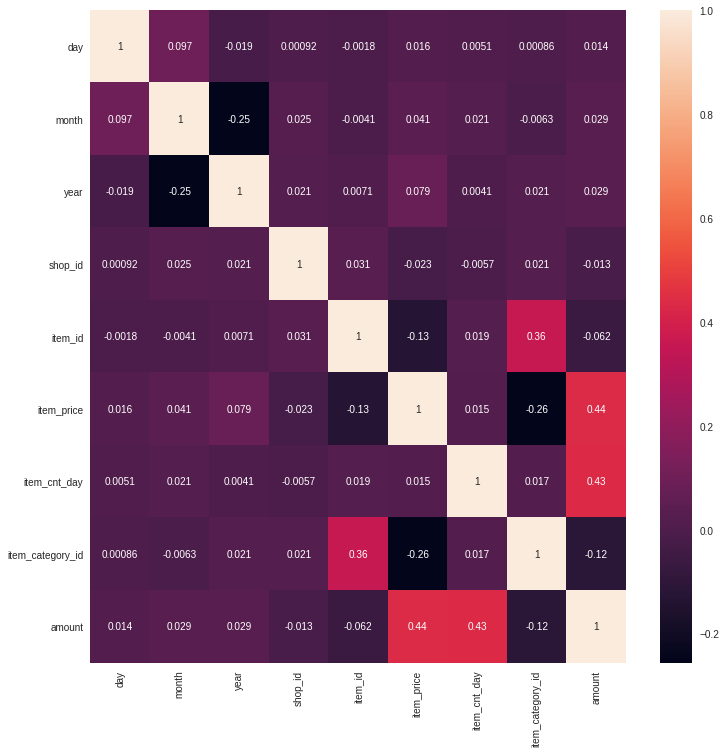

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(final_store.corr(), annot=True)
plt.show()

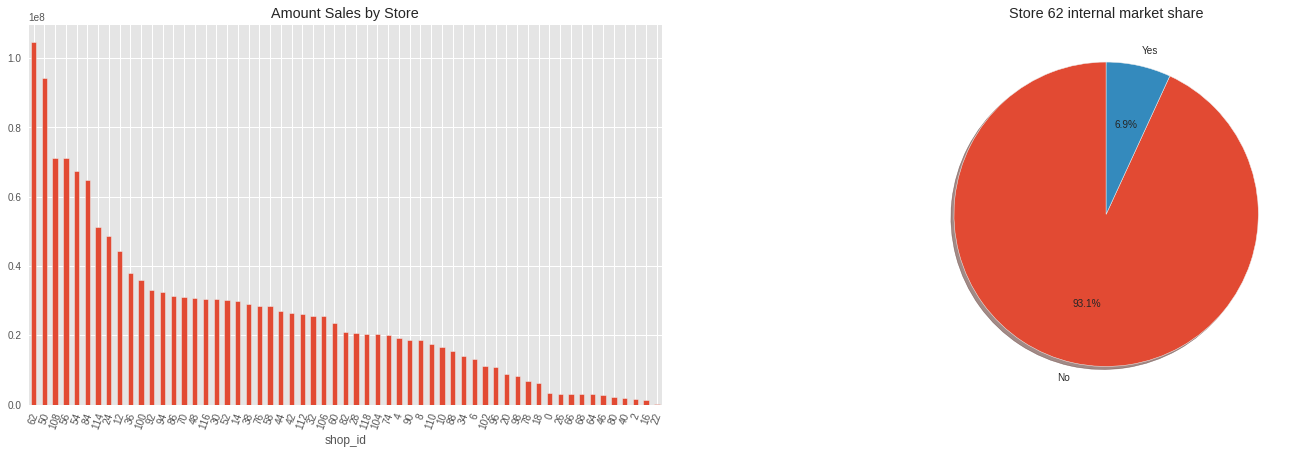

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)

group = final_store.groupby(['shop_id']).amount.sum().sort_values(ascending=False)
group.plot(kind='bar', title='Amount Sales by Store', rot=70)

# Top five stores by sales
final_store['internal'] = final_store.shop_id.apply(lambda x: 'Yes' if x==62 else 'No' )
shoprite_market = final_store.groupby(['internal']).amount.sum().sort_values(ascending=False)

# Lets look at store 62, market share internally

f2= fig.add_subplot(122)
g = plt.pie(shoprite_market, labels=shoprite_market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Store 62 internal market share')
plt.show()

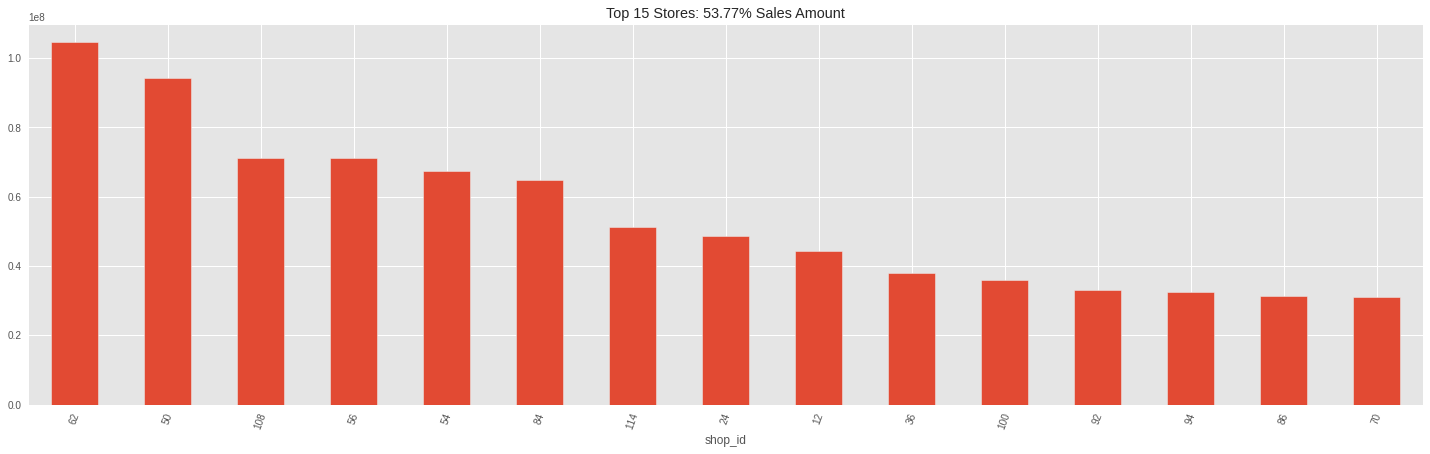

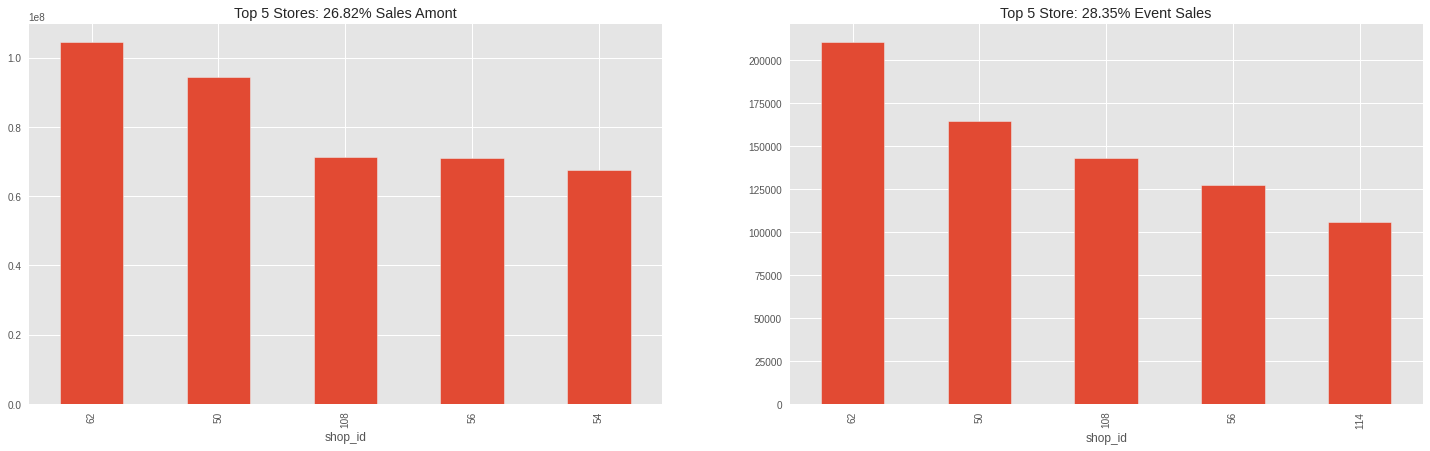

In [ ]:
fig = plt.figure(figsize=(25, 7))

# Top 15 store and with internal market share
PercentSales =  np.round((final_store.groupby(["shop_id"]).amount.sum().sort_values(ascending = False)[:15].sum() / 
                          final_store.groupby(["shop_id"]).amount.sum().sort_values(ascending = False).sum()) * 100, 2)
PercentSales
g = final_store.groupby(["shop_id"]).amount.sum().sort_values(ascending = False)[:15]
g.plot(kind='bar', title='Top 15 Stores: {:3.2f}% Sales Amount'.format(PercentSales), rot=70)

# Top 5 store and internal shoprite share
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales = np.round((final_store.groupby(["shop_id"]).amount.sum().sort_values(ascending = False)[:5].sum() /
                         final_store.groupby(["shop_id"]).amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = final_store.groupby(["shop_id"]).amount.sum().sort_values(ascending = False)[:5]
g.plot(kind='bar', title='Top 5 Stores: {:3.2f}% Sales Amont'.format(PercentSales))


# Stores with more sales (Instead of SUM we use COUNT)
f1 = fig.add_subplot(122)
PercentSales =  np.round((final_store.groupby(["shop_id"]).amount.count().sort_values(ascending = False)[:5].sum() /
                          final_store.groupby(["shop_id"]).amount.count().sort_values(ascending = False).sum()) * 100, 2)

g = final_store.groupby(["shop_id"]).amount.count().sort_values(ascending = False)[:5]
g.plot(kind='bar', title='Top 5 Store: {:3.2f}% Event Sales'.format(PercentSales))

plt.show()

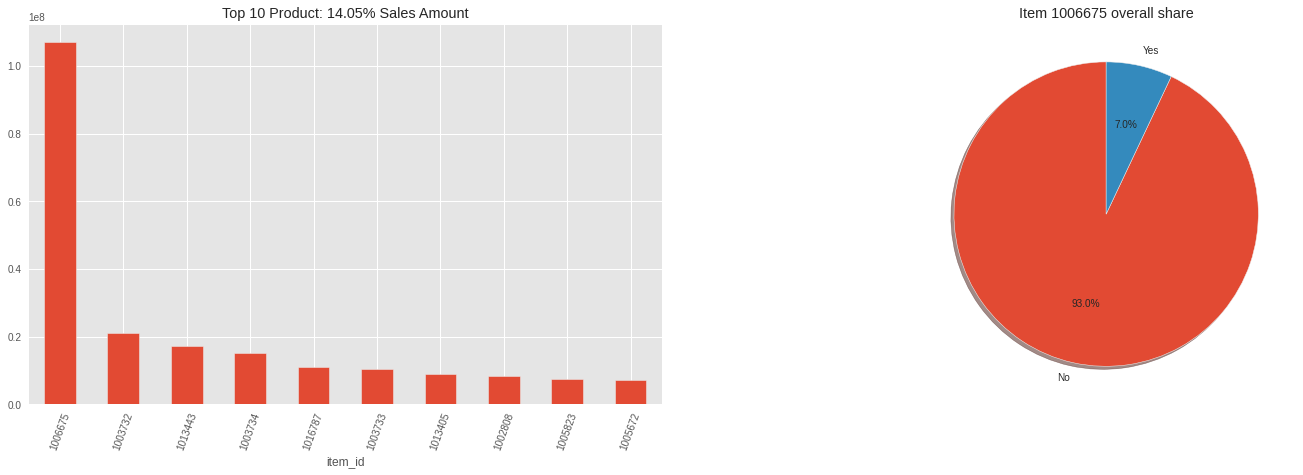

In [ ]:
# LETS HAVE A LOOK AT PRODUCT
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
# Top 10 products based on sales amount
PercentSales =  np.round((final_store.groupby(["item_id"]).amount.sum().sort_values(ascending = False)[:10].sum() / 
                          final_store.groupby(["item_id"]).amount.sum().sort_values(ascending = False).sum()) * 100, 2)
PercentSales
g = final_store.groupby(["item_id"]).amount.sum().sort_values(ascending = False)[:10]
g.plot(kind='bar', title='Top 10 Product: {:3.2f}% Sales Amount'.format(PercentSales), rot=70)

# Lets look at Product 1006675 share
# Top five stores by sales
final_store['internal'] = final_store.item_id.apply(lambda x: 'Yes' if x==1006675 else 'No' )
product_market = final_store.groupby(['internal']).amount.sum().sort_values(ascending=False)

# Lets look at store 62, market share internally

f2= fig.add_subplot(122)
g = plt.pie(product_market, labels=product_market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Item 1006675 overall share')
plt.show()


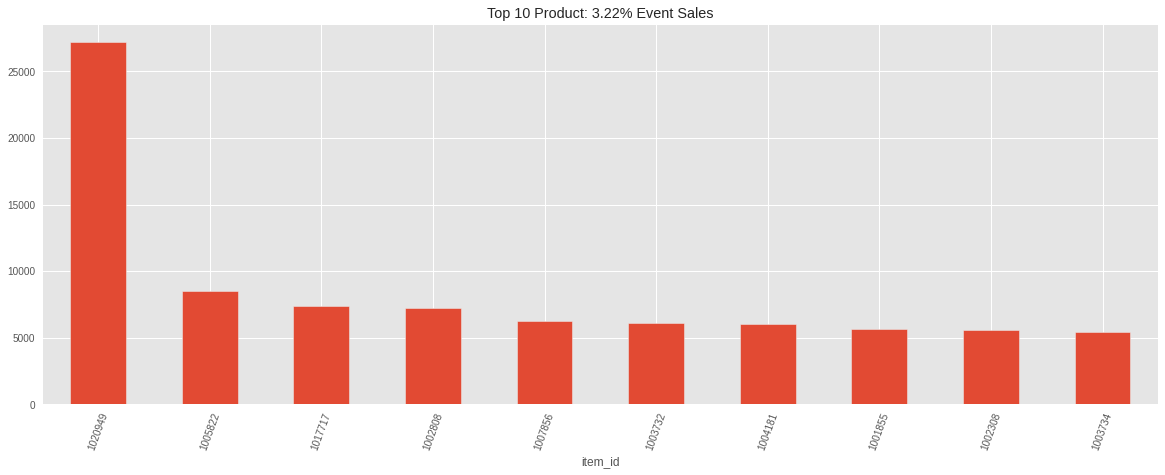

In [ ]:
## Which product are brought more frequestly?
fig = plt.figure(figsize=(20, 7))

# Product with more sales (Instead of SUM we use COUNT)
PercentSales =  np.round((final_store.groupby(["item_id"]).amount.count().sort_values(ascending = False)[:10].sum() /
                          final_store.groupby(["item_id"]).amount.count().sort_values(ascending = False).sum()) * 100, 2)

g = final_store.groupby(["item_id"]).amount.count().sort_values(ascending = False)[:10]
g.plot(kind='bar', title='Top 10 Product: {:3.2f}% Event Sales'.format(PercentSales), rot=70)

plt.show()

In [ ]:
# Which product are frequently bought and have high sale amount (Top ten)
sale_amount = final_store.groupby(["item_id"]).amount.sum().sort_values(ascending = False)[:10]
sale_event = final_store.groupby(["item_id"]).amount.count().sort_values(ascending = False)[:10]

print('Top ten product with high sale amount and are frequently bought: ',(sale_amount.index == sale_event.index).sum())


print('''
It look like only expensive product are not frequently brought and cheap product
 are frequently bought, but do not add make 
it top the top ten of high amount in sales
''')

Top ten product with high sale amount and are frequently bought:  0

It look like only expensive product are not frequently brought and cheap product
 are frequently bought, but do not add make 
it top the top ten of high amount in sales



In [ ]:
# Whats is the relatioship between top 10 Item and top ten 10 Store? Do top ten store sell top ten item?

fig = plt.figure(figsize=(25, 7))

print("Event sales by store")
g = final_store.groupby(["shop_id", "item_id"]).amount.count().sort_values(ascending = False)[:10]
print(g)
print('''
It look like most frequently item sold is "1020949" by all the top store 
''')


print("Amount Sales by Store")
g = final_store.groupby(["shop_id", "item_id"]).amount.sum().sort_values(ascending = False)[:10]
print(g)
print('''
It look like the item "1006675" has high sale amount for all top store 
''')




Event sales by store
shop_id  item_id
106      1020949    731
44       1020949    721
56       1020949    716
62       1020949    710
32       1020949    704
14       1020949    695
112      1020949    694
70       1020949    687
84       1020949    681
42       1020949    681
Name: amount, dtype: int64

It look like most frequently item sold is "1020949" by all the top store 

Amount Sales by Store
shop_id  item_id
24       1006675    7149285
50       1006675    5614811
62       1006675    5417928
84       1006675    5156703
54       1006675    4281039
108      1006675    3759421
56       1006675    3671866
36       1006675    3644450
86       1006675    3447761
114      1006675    3247986
Name: amount, dtype: int64

It look like the item "1006675" has high sale amount for all top store 



<Figure size 1800x504 with 0 Axes>

In [ ]:
#  Which item_id is sold more per day? Have a look at (item_cnt_day)

print('Number of products sold per day')
g = final_store.groupby(["shop_id", "item_id"])
g.sum()[['item_cnt_day']].sort_values(ascending = False, by='item_cnt_day')[:10]

print("We can see that the item_id '1020949' is sold more in number, per day")

Number of products sold per day
We can see that the item_id '1020949' is sold more in number, per day


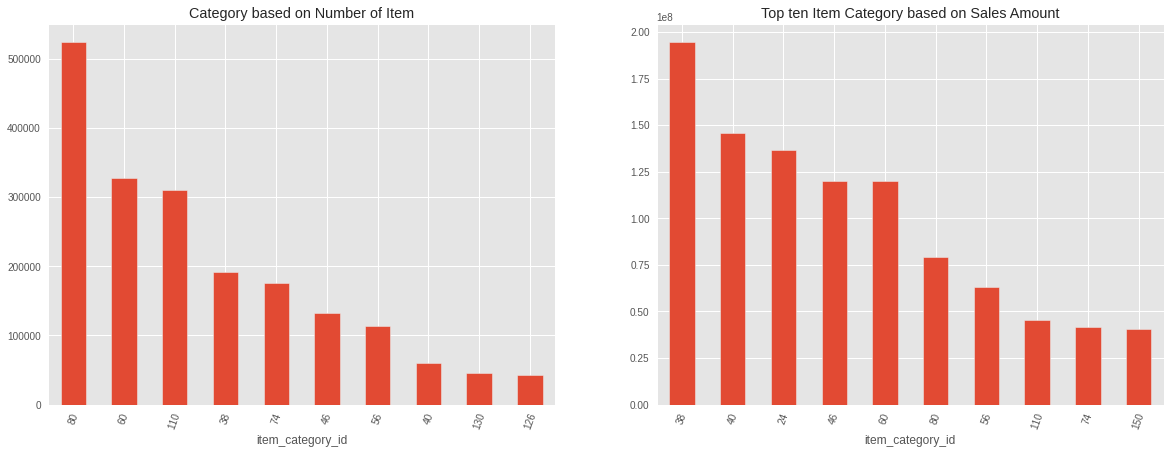

In [ ]:
# LETS HAVE A LOOK AT ITEM CATEGORY ID and SHOP_ID
fig = plt.figure(figsize=(20, 7))

# 1. which category has more product
f = fig.add_subplot(121)
g = final_store.groupby(["item_category_id"]).item_id.count().sort_values(ascending = False)[:10]
g.plot(kind='bar', title="Category based on Number of Item", rot=70)

# 2. Which category has more sales?
f1 = fig.add_subplot(122)
g1 = final_store.groupby(["item_category_id"]).amount.sum().sort_values(ascending = False)[:10]
g1.plot(kind='bar', title="Top ten Item Category based on Sales Amount", rot=70)

plt.show()

## WHICH STORE IS DOING WELL?
###### we are going to use the date columns to see trend for each store in terms of the sales and revenue

In [ ]:
del final_store['internal']

# sort the date on the index
final_store.sort_values(by=['date'], inplace=True, ascending=True)

# Make the date an index
# final_store.set_index('date', inplace=True)

In [ ]:
fig = plt.figure(figsize=(20, 7))

g1 = final_store.groupby(['shop_id', 'month'])
g1.sum()[['amount']].iloc[:10]

amount
shop_id month         
0       1      1484560
        2      1837112
2       1       764394
        2       856311
4       1      1779714
        2      1664628
        3      1838943
        4      1490794
        5      1710620
        6      1048632

<Figure size 1440x504 with 0 Axes>

## Some of the store do not operate for 12 months, But this is good for us to cluster this stores
##### I cannot compare the stores performance based on date and month, because of incosistency 

##### "I wanted to do a forecast on sale for the stores"

In [ ]:
# The store_id 0 only operate on Jan and Feb
final_store[(final_store['shop_id'] == 0)]['month'].unique()

array([1, 2])

In [ ]:
# Instead lets look at how shoprite was doing as a whole 

fig = plt.figure(figsize=(20, 7))

g1 = final_store.groupby(['year']) # Please note that 2020, was not complete, the end on 2020-05-31
g1.sum()[['amount']]

,amount
year,
2018,611263379
2019,676092659
2020,236495132


<Figure size 1440x504 with 0 Axes>

#### PLEASE SEE MY OTHER NOTEBOOK, IT SHOWS YOU THE TRENDS OF SHOPRITE, 
#### Accoding to the stock market, shoprite experienced a decline from 2018 up to 2020 July. I have also done forecasting to see where the company will be in 2023. 

##### For more information, please see my other notebook

# STORE SEGMENTATION

### RFM Model for Store Value

###### since our data is limited in terms of sales record and did not have other information about our stores, we will use a RFM, 'Recency, frequecy, and Monetary Value based model to find store segments 

###### 1. **Recency**

In [ ]:
import datetime

reference_date = final_store.date.max() + datetime.timedelta(days=1)
print("Reference Date: ", reference_date)

final_store['days_last_sold'] = (reference_date - final_store.date).astype('timedelta64[D]')

store_history_df = final_store[['shop_id', 'days_last_sold']].groupby('shop_id').min().reset_index()

# Lets change the column name to recency
store_history_df.rename(columns={'days_last_sold': 'recency'}, inplace=True)

store_history_df.describe().transpose()

Reference Date:  2020-06-01 00:00:00


,count,mean,std,min,25%,50%,75%,max
shop_id,59.0,58.779661,35.186237,0.0,29.0,58.0,89.0,118.0
recency,59.0,92.406780,221.664636,1.0,1.0,1.0,30.0,824.0


###### We will plot the Recency distribution and QQ-plot to identify substantive departures from normality, like outliers, skewness, and kurtosis. 

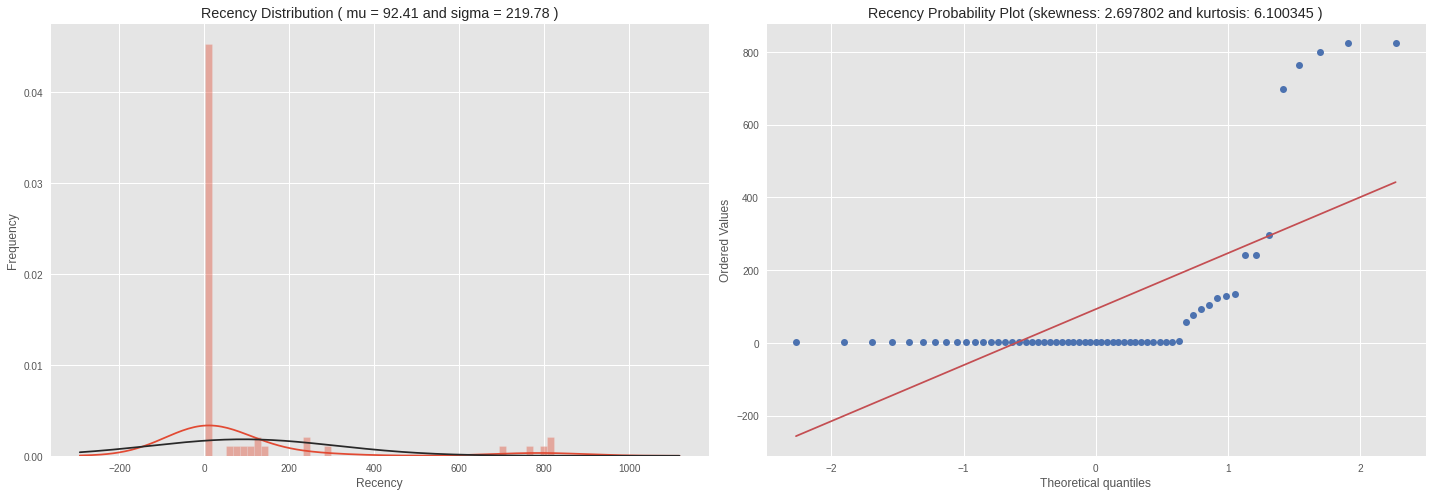

In [ ]:
from scipy.stats import skew, norm, probplot, boxcox

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(store_history_df.recency, 'Recency')

###### The graph on the left illutrate a skewed sales frequency distribution, and has a long tail on the right and peak on the left.In short, it is positvely biased and deviates from normal distribution.

###### On the other hand, the blue points were suppose to follow the red line, which represent normal distribution. The distribution is right skewed.

###### 2. **Frequency** 

   shop_id  item_id
0        0     3600
1        2     2523
2        4     4341
3        6     4808
4        8     6773


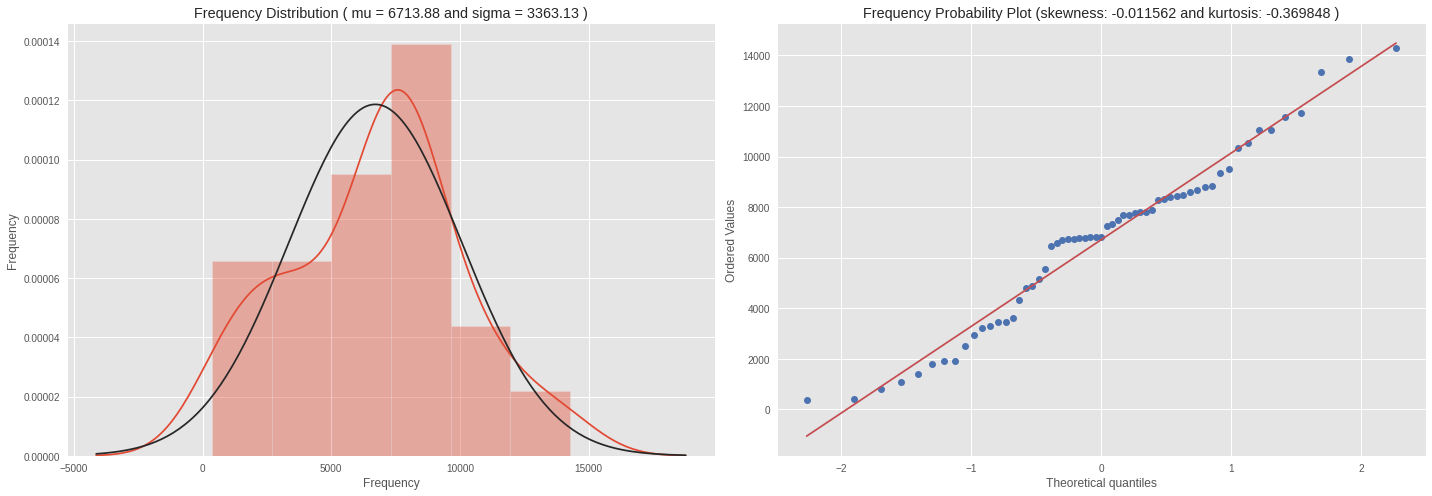

In [ ]:
store_freq = (final_store[['shop_id', 
                           'item_id']].groupby(['shop_id',
                                                'item_id']).count().reset_index()).groupby(['shop_id']).count().reset_index()
print(store_freq[:5]) # we can see that store 62 and 50 is still leading in terms of sales of item

store_freq.rename(columns={'item_id': 'frequency'}, inplace =True)
store_history_df = store_history_df.merge(store_freq)

# Plot
QQ_plot(store_history_df.frequency, 'Frequency')

##### Not bad at all, for the first graph we see that sales frequency is some what symmetric, it do not deviates from the normal distribution.

##### on the probabilty plot, the skewness is  low, "-0.01", and align with diagonal and confirm symmetric

## Consideration
###### To make our model powerful, i am going to use the product_category columns alsp, The correlation between item_id and product category is less than 50%. 

###### Hypothesis, the might be some stores which sell certain products, and some do not. 

   shop_id  item_category_id
0        0                48
1        2                41
2        4                58
3        6                57
4        8                60


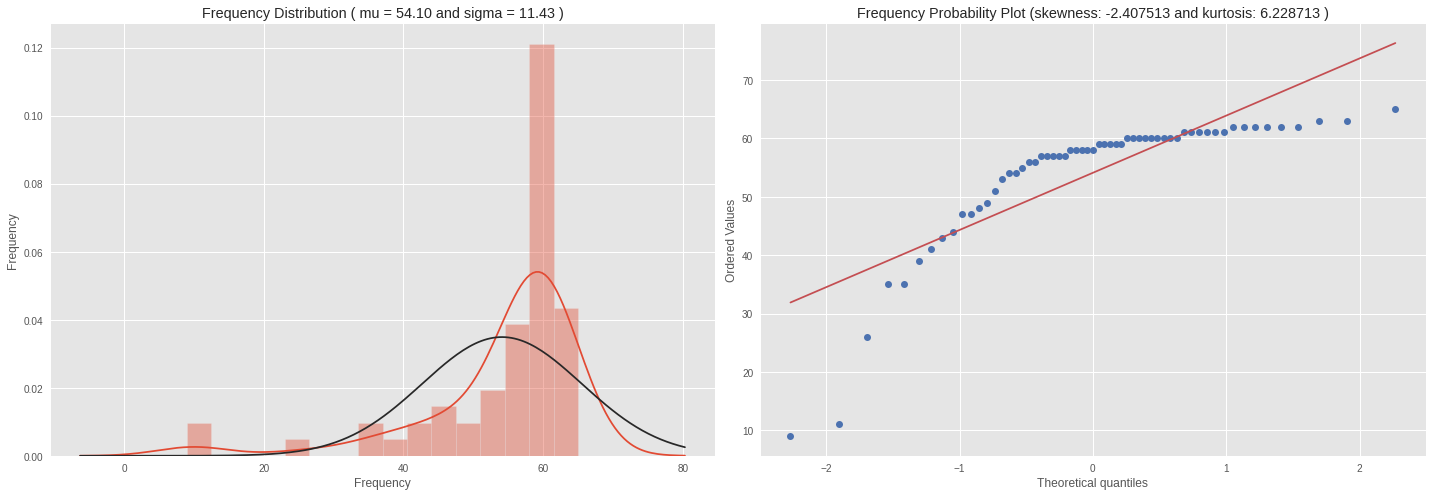

In [ ]:
store_freq_cat = (final_store[['shop_id', 
                           'item_category_id']].groupby(['shop_id',
                                                'item_category_id']).count().reset_index()).groupby(['shop_id']).count().reset_index()
print(store_freq_cat[:5]) # we can see that store 62 and 50 is still leading in terms of sales of item

store_freq_cat.rename(columns={'item_category_id': 'frequency_cat'}, inplace =True)
store_history_df = store_history_df.merge(store_freq_cat)

# Plot
QQ_plot(store_history_df.frequency_cat, 'Frequency')

###### 3. **Monetary**

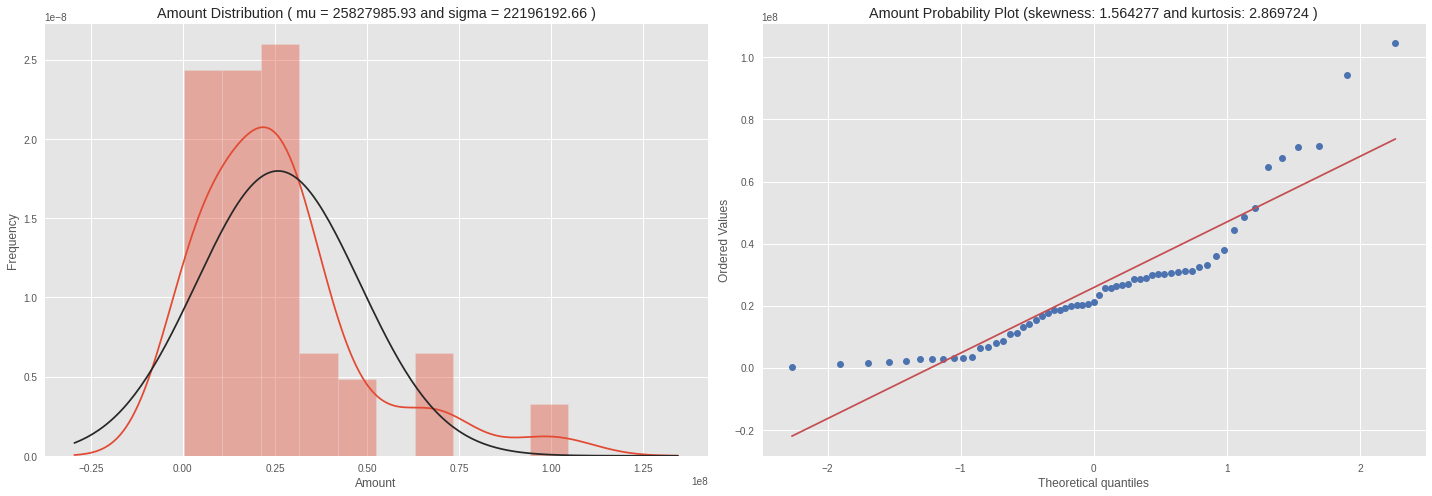

In [ ]:
store_monetary_val = final_store[['shop_id', 'amount']].groupby('shop_id').sum().reset_index()

store_history_df = store_history_df.merge(store_monetary_val)

QQ_plot(store_history_df.amount, 'Amount')

###### From the first graph above we can see that sales amount distribution is skewed a little bit, has a peak on the left and a long tail to the right. It deviates from normal distribution and is positively biased.

##### From the Probability Plot, we could see that sales amount also does not align with the diagonal, special on the right.

In [ ]:
store_history_df.describe()

,shop_id,recency,frequency,frequency_cat,amount
count,59.000000,59.000000,59.000000,59.000000,5.900000e+01
mean,58.779661,92.406780,6713.881356,54.101695,2.582799e+07
std,35.186237,221.664636,3391.994018,11.527620,2.238672e+07
min,0.000000,1.000000,371.000000,9.000000,2.609790e+05
25%,29.000000,1.000000,3970.500000,53.500000,9.768306e+06
50%,58.000000,1.000000,6805.000000,58.000000,2.103728e+07
75%,89.000000,30.000000,8526.500000,60.500000,3.092569e+07
max,118.000000,824.000000,14272.000000,65.000000,1.046305e+08


### Data Preprocessing

###### the huge range of values for each varibale is a huge problem, especially for the monetary amount variable, we need to tranform all the varibales on the log scale or  standadisation. This ensure that all values are on the smae scale

###### Note, to make inferences, we will need to reversed the logges and transformed values back the the original RFM figures

In [ ]:
# Sklearn library can also bes used 
import math
from sklearn import preprocessing

store_history_df['recency_log'] = store_history_df['recency'].apply(math.log)
store_history_df['frequency_log'] = store_history_df['frequency'].apply(math.log)
store_history_df['amount_log'] = store_history_df['amount'].apply(math.log)
store_history_df['freq_cat_log'] = store_history_df['frequency_cat'].apply(math.log)


feature_vector = ['amount_log', 'frequency_log', 'recency_log', 'freq_cat_log']


X_subset = store_history_df[feature_vector]
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

pd.DataFrame(X_scaled, columns=X_subset.columns).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount_log,59.0,5.739289e-17,1.008584,-3.431457,-0.408742,0.237734,0.559787,1.578603
frequency_log,59.0,4.083363e-16,1.008584,-3.382951,-0.397780,0.287474,0.571979,1.221910
recency_log,59.0,1.806465e-16,1.008584,-0.583993,-0.583993,-0.583993,0.533186,2.188151
freq_cat_log,59.0,1.678507e-15,1.008584,-4.956287,0.089621,0.318375,0.437745,0.640945


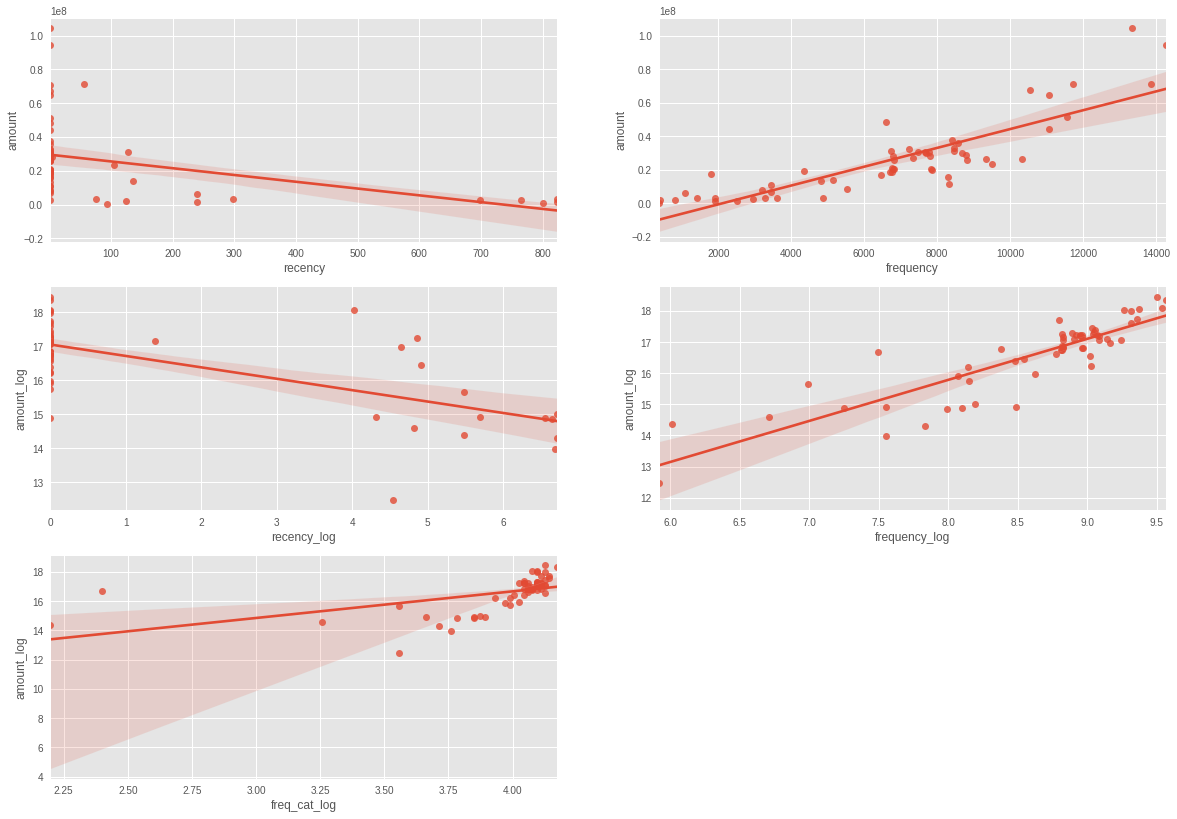

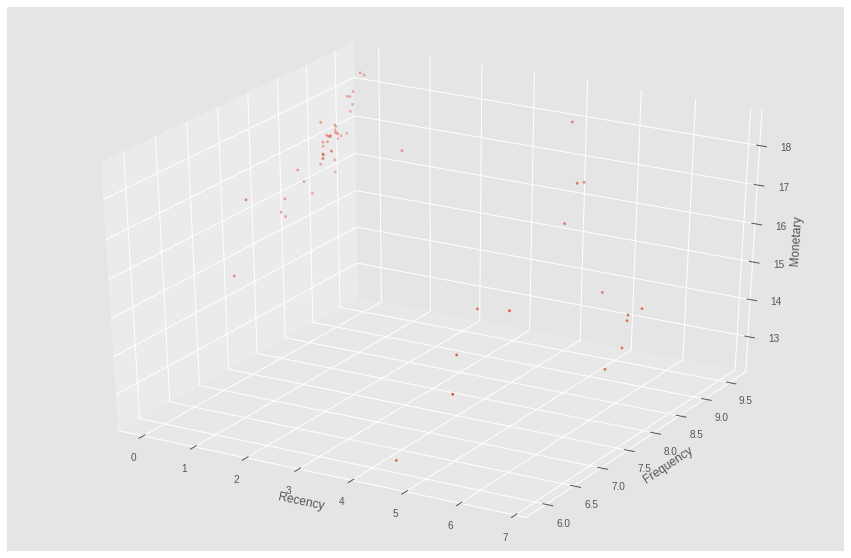

In [ ]:
# Lets Visualise this

fig = plt.figure(figsize=(20, 14))
f1 = fig.add_subplot(321)
sns.regplot(x='recency', y='amount', data=store_history_df)
f1 = fig.add_subplot(322)
sns.regplot(x='frequency', y='amount', data=store_history_df)
f1 = fig.add_subplot(323)
sns.regplot(x='recency_log', y='amount_log', data=store_history_df)
f1 = fig.add_subplot(324)
sns.regplot(x='frequency_log', y='amount_log', data=store_history_df)
f1 = fig.add_subplot(325)
sns.regplot(x='freq_cat_log', y='amount_log', data=store_history_df)

fig = plt.figure(figsize=(15, 10))
ax= fig.add_subplot(111, projection='3d')

xs = store_history_df.recency_log
ys = store_history_df.frequency_log
zs = store_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()


The plot aboves clearly indicate that the stores that sell with higher frequency and more recency tend to sell more based on the increasing amount value. 

## **CLUSTERING** **FOR** **SEGMENTS**
##### 1. K-MEANS - k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. Source: https://en.wikipedia.org/wiki/K-means_clustering

###### 1.1 We will use the Elbow method to find the optimal number of clusters. The idea behind this is to indeftify the values of k "cluster" where the distortion begins to increase most rapidly

###### **Please** **Note**: that I have used DBSCAN as alternative algorithms for Kmeans. 



1.   DBSCAN is Good for data which contains clusters of similar density.However for this problem, the algorithm  did not cluster the data because of larger diferences in densities well. It was also difficulty to choose the appropritely eps values

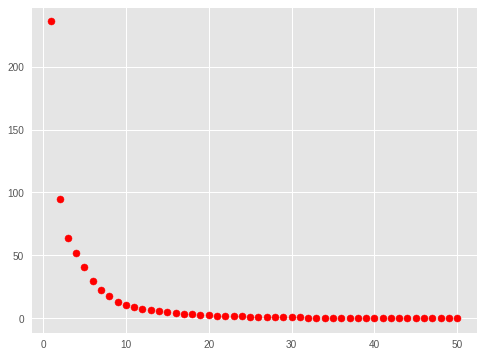

The best K is:  50


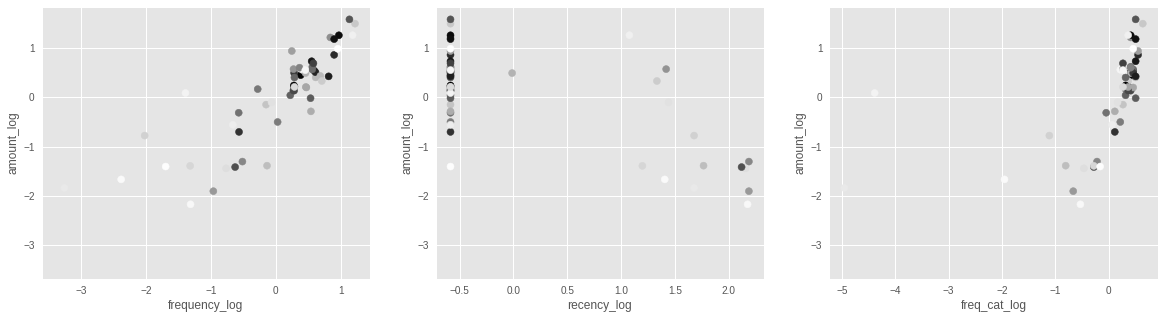

In [ ]:
from sklearn.cluster import KMeans

cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    #  K means model, using the k clusters
    model = KMeans(
        n_clusters=k, 
        init='k-means++',  # The kmean ++ place the initial centroids far away from each other
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    
    labels = model.labels_ # These are our fitted labels(0, 1)
 
   
    interia = model.inertia_ # sum of diatnces of samples to the closest cluster center

    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# CREATING A K-MEANS MODEL WITH BEST K
print('The best K is: ', k_best)

model = KMeans(n_clusters=k_best, init='k-means++', n_init=10, max_iter=300,
               tol=1e-04, random_state=12345)

model = model.fit(X_scaled) # we are giving the mode the scaled data

labels = model.labels_

# LETS VISUALISE OUR MODEL RESULTS
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(131)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(132)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(133)
plt.scatter(x = X_scaled[:,3], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[3])
ax.set_ylabel(feature_vector[0])

plt.show()

#### Does it make sense to have 50 clusters? Lets use silhouette_score to analyse our clusters

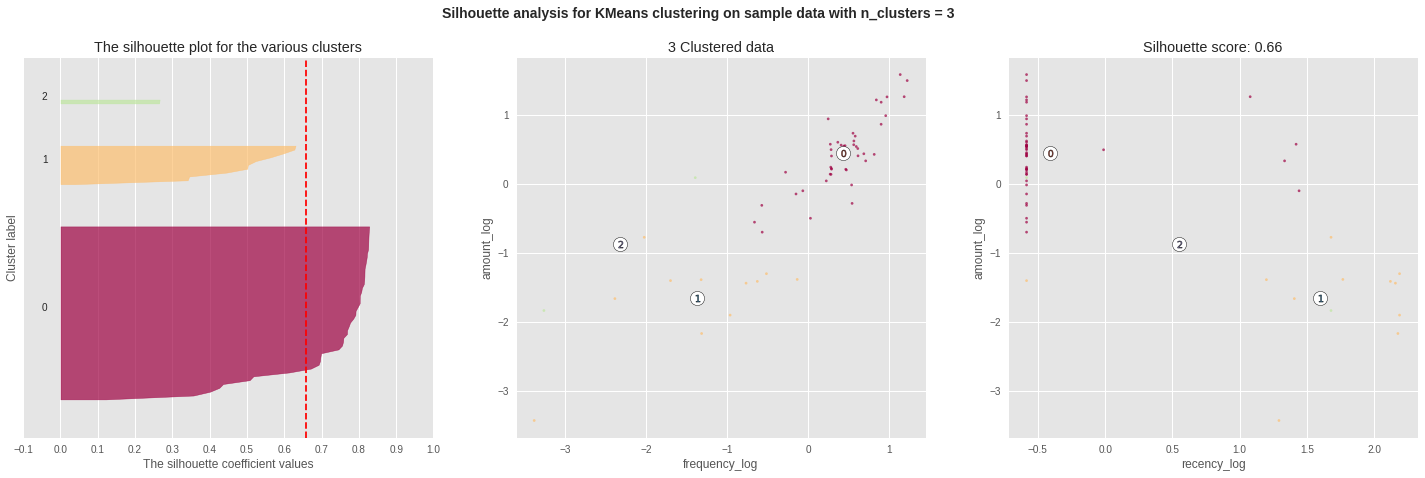

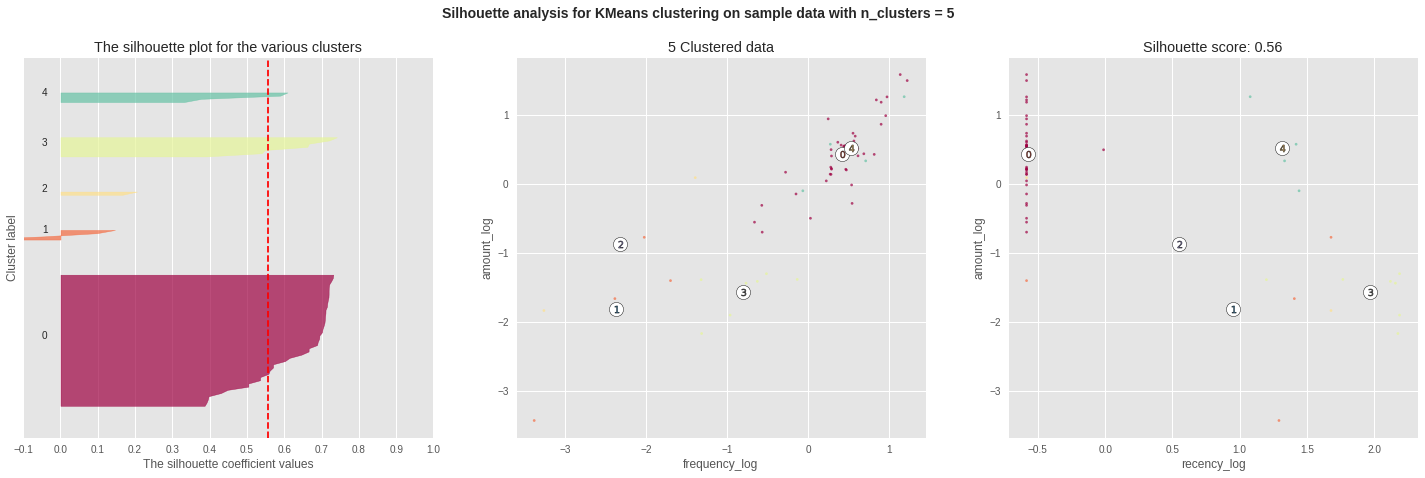

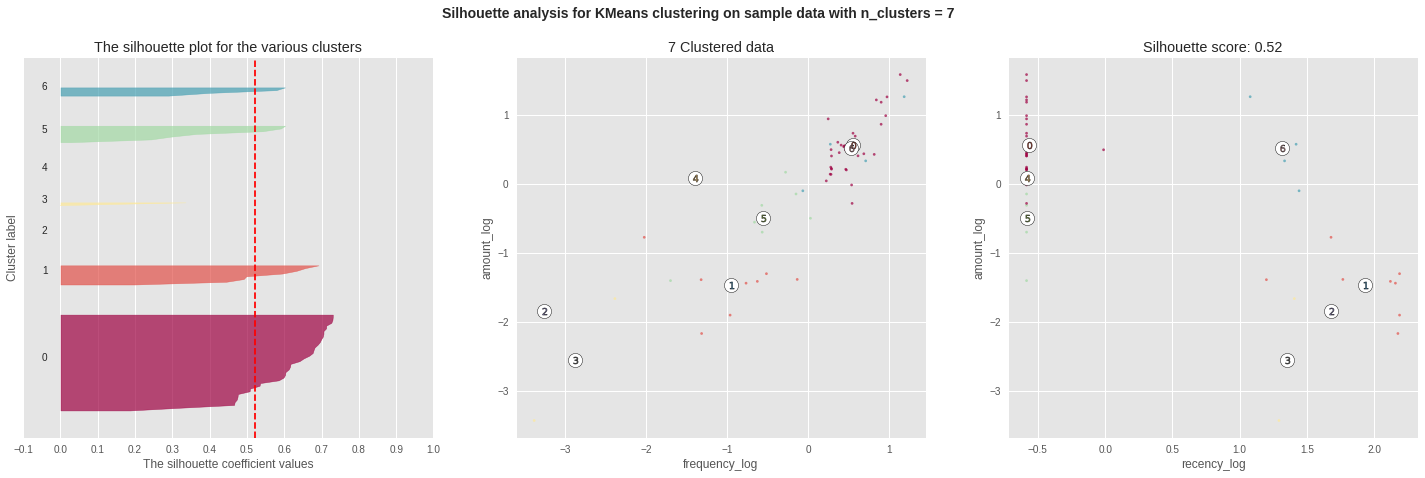

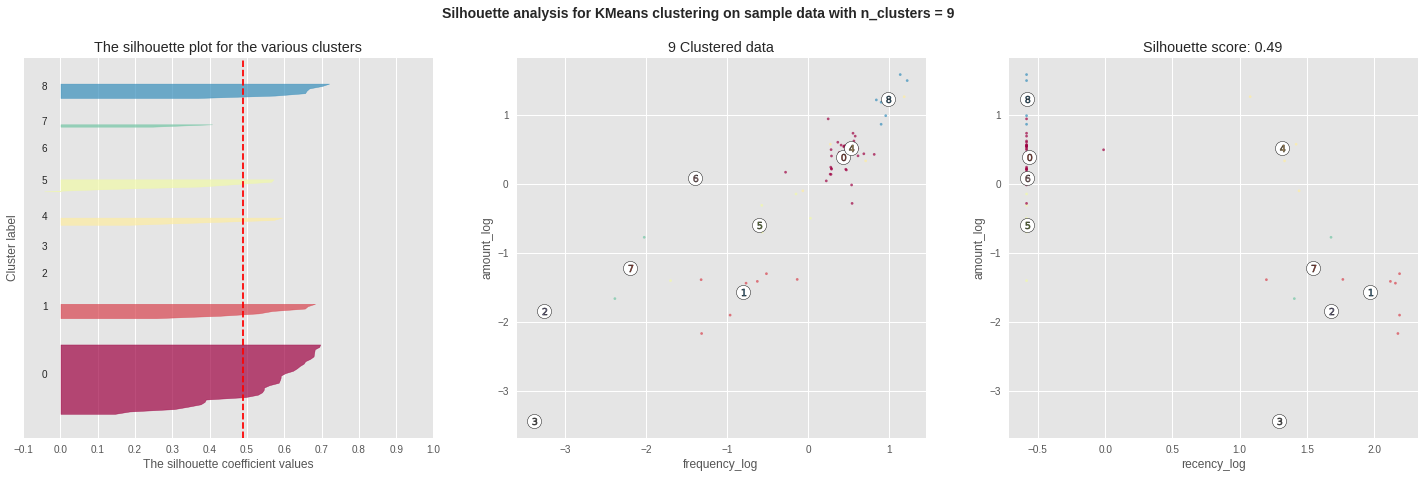

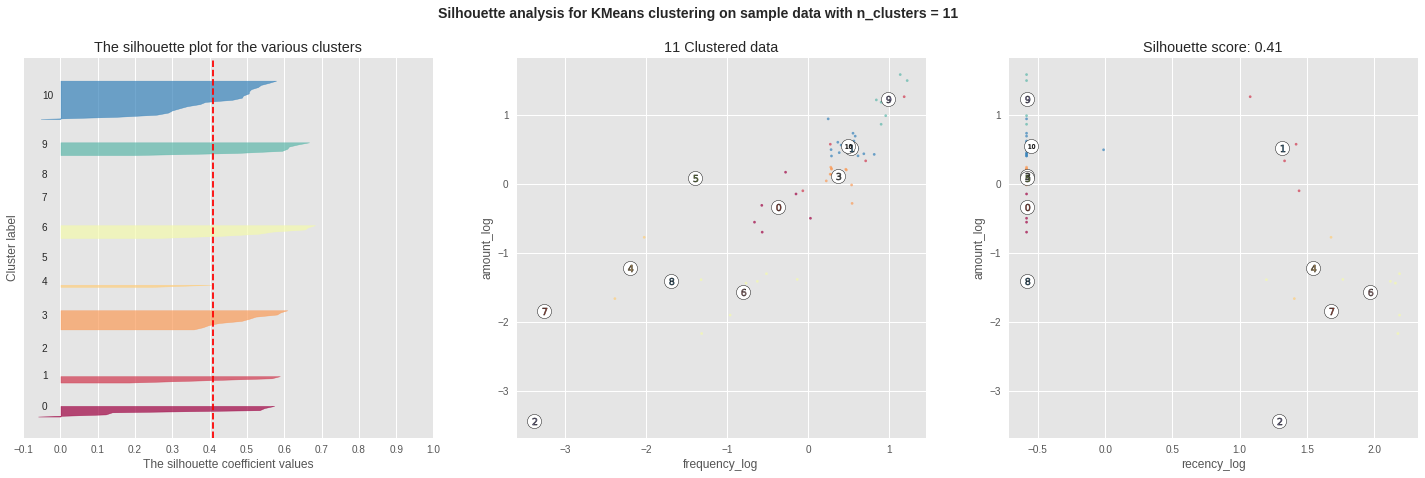

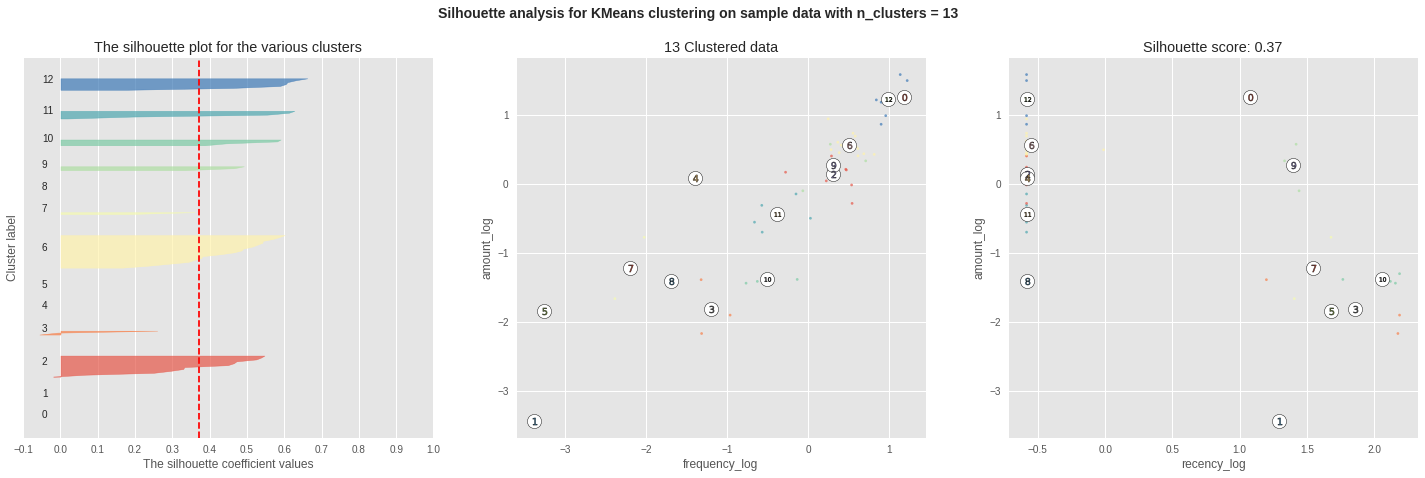

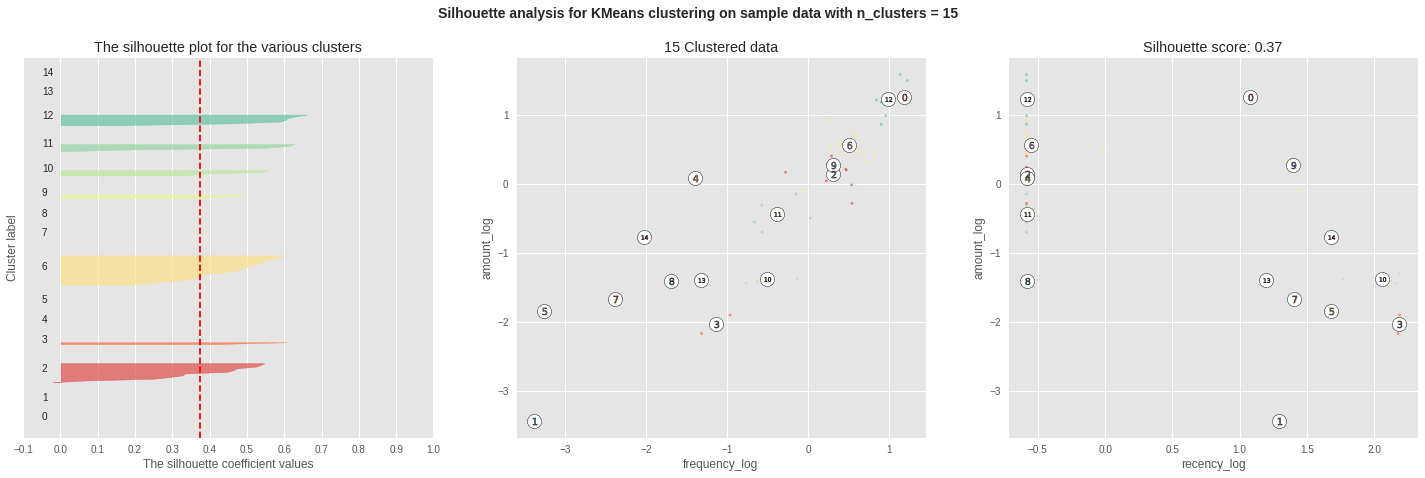

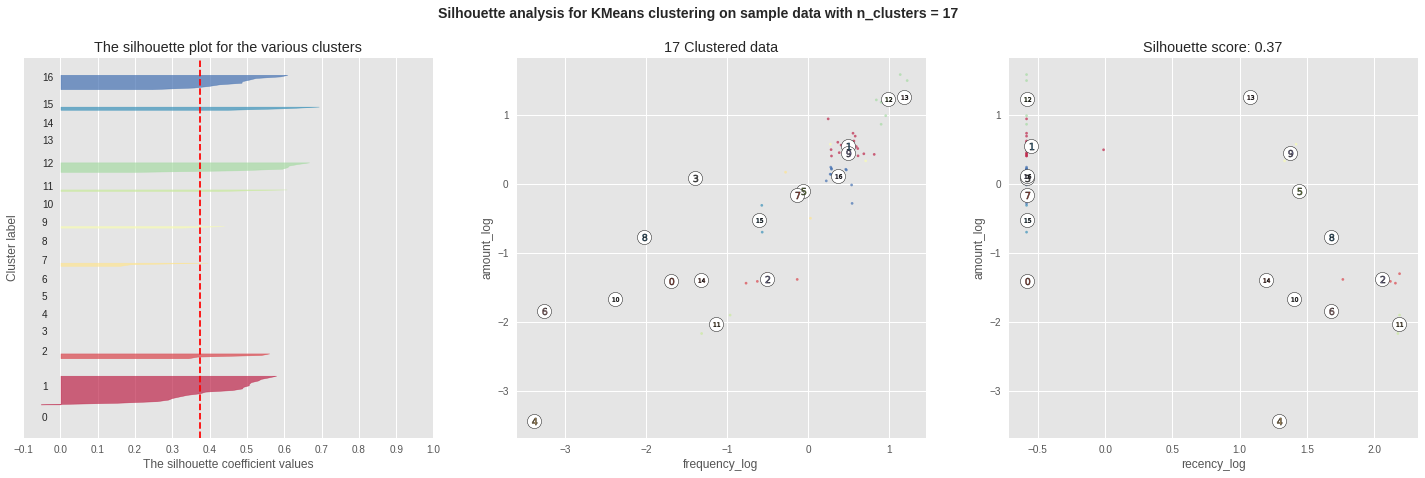

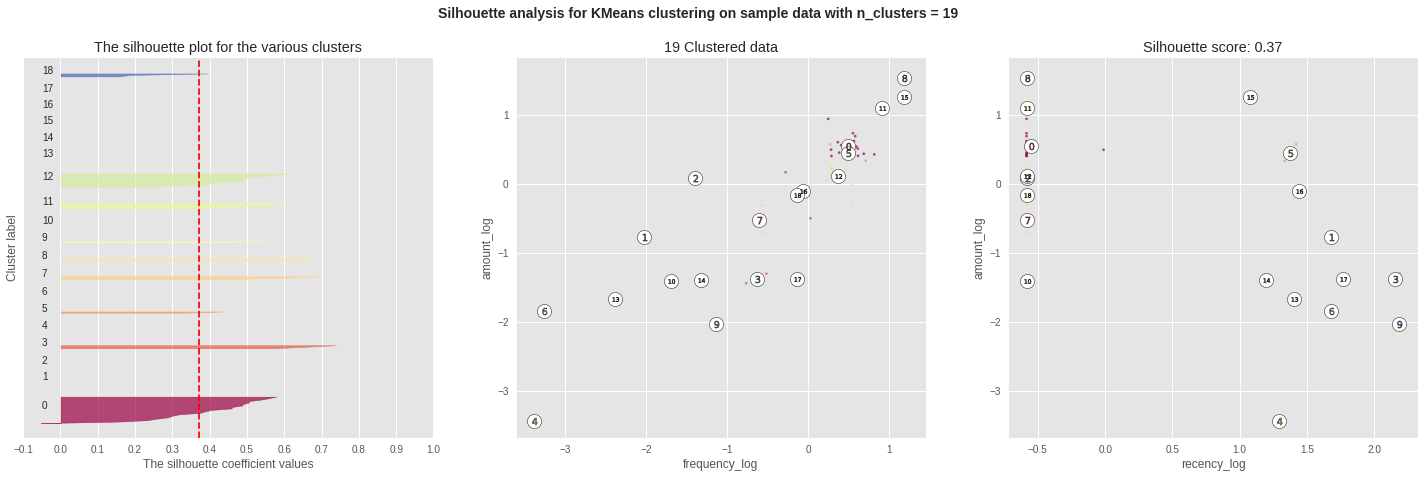

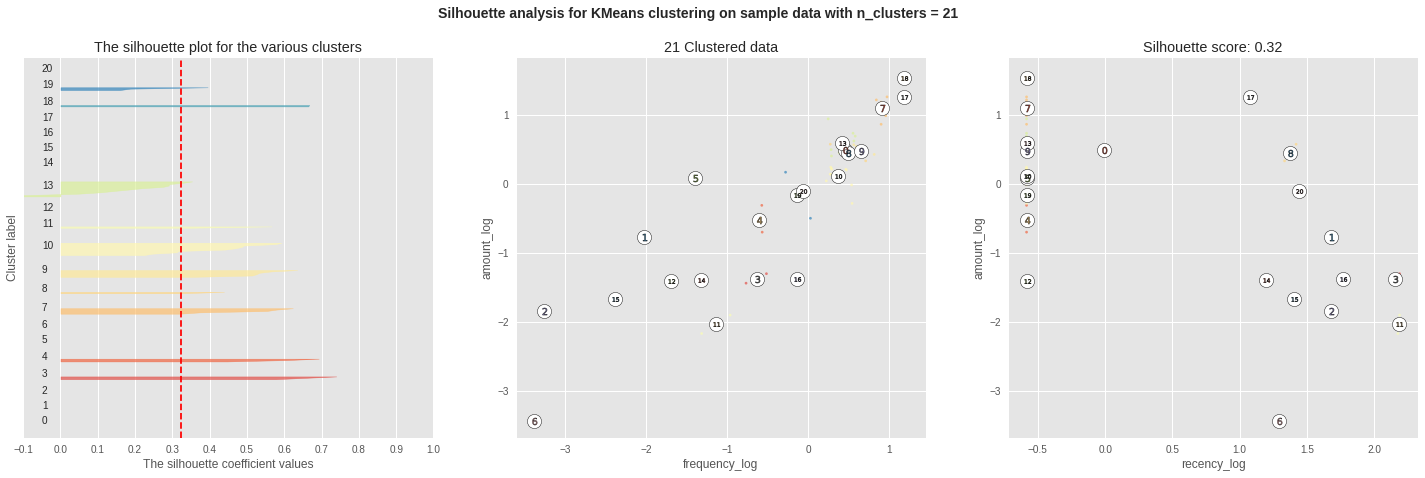

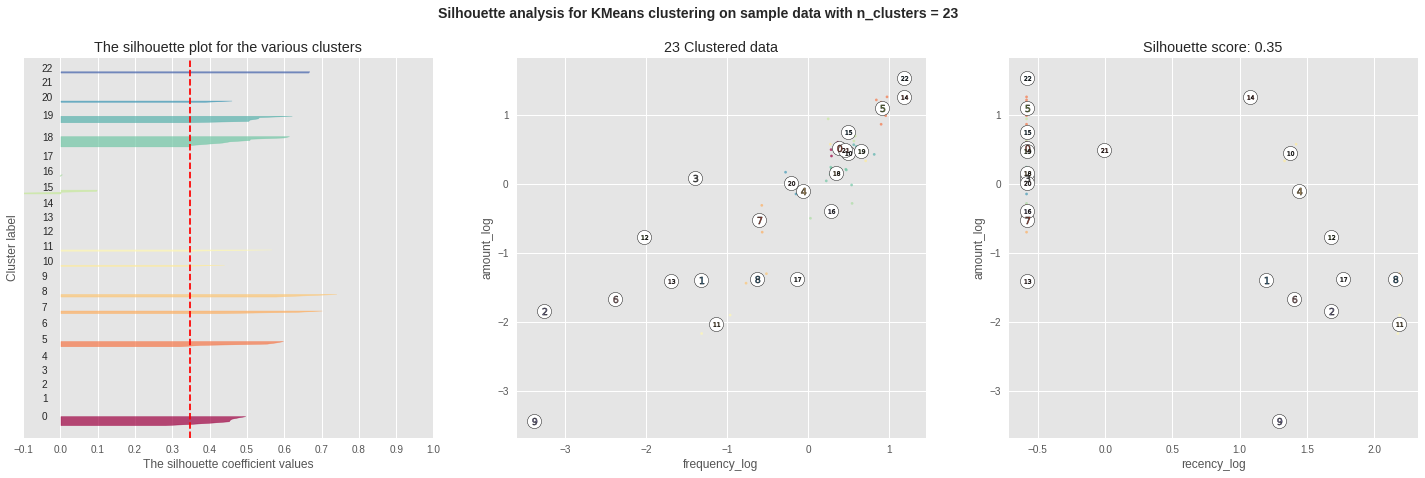

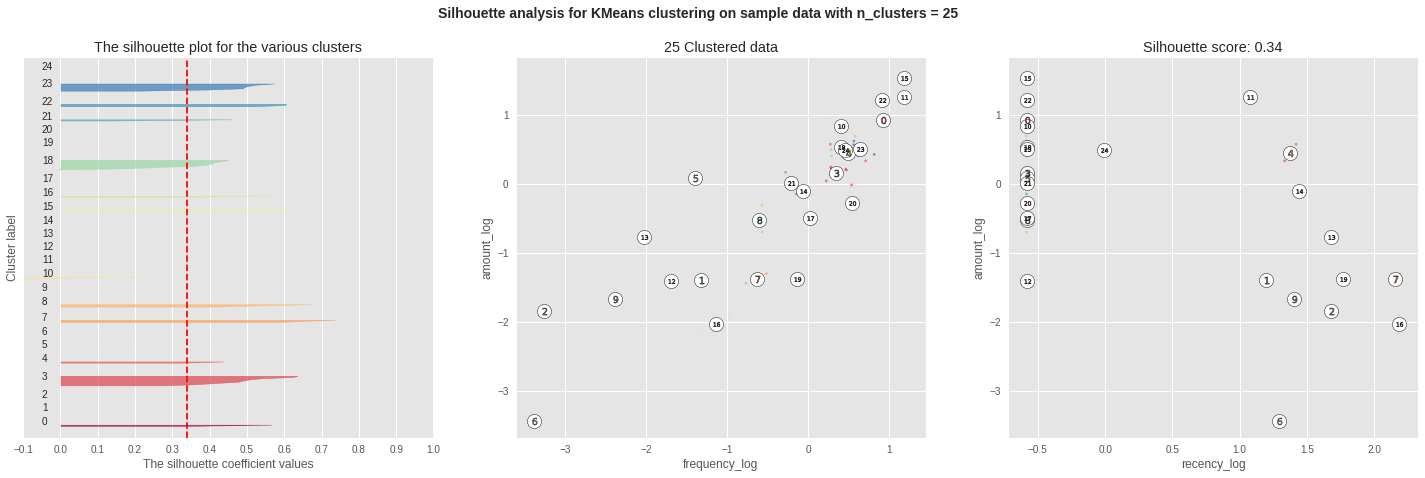

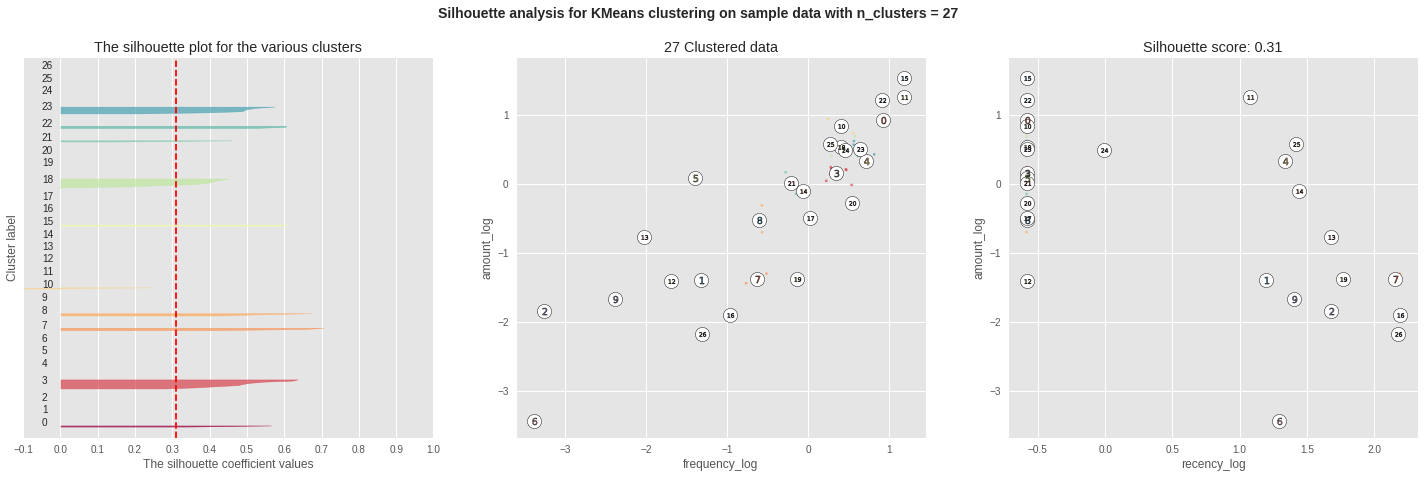

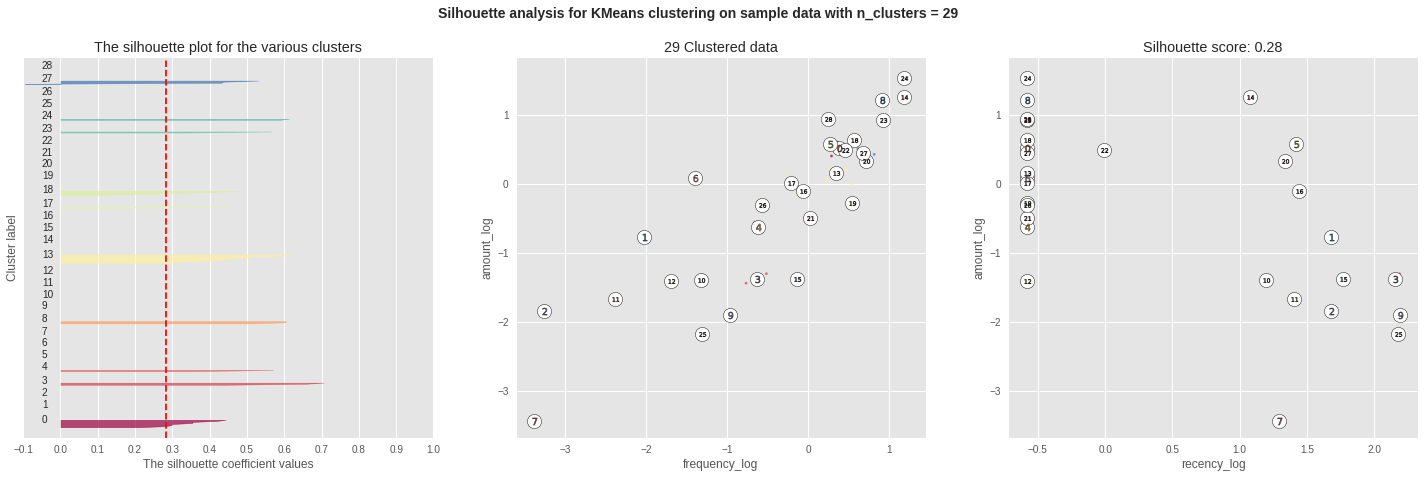

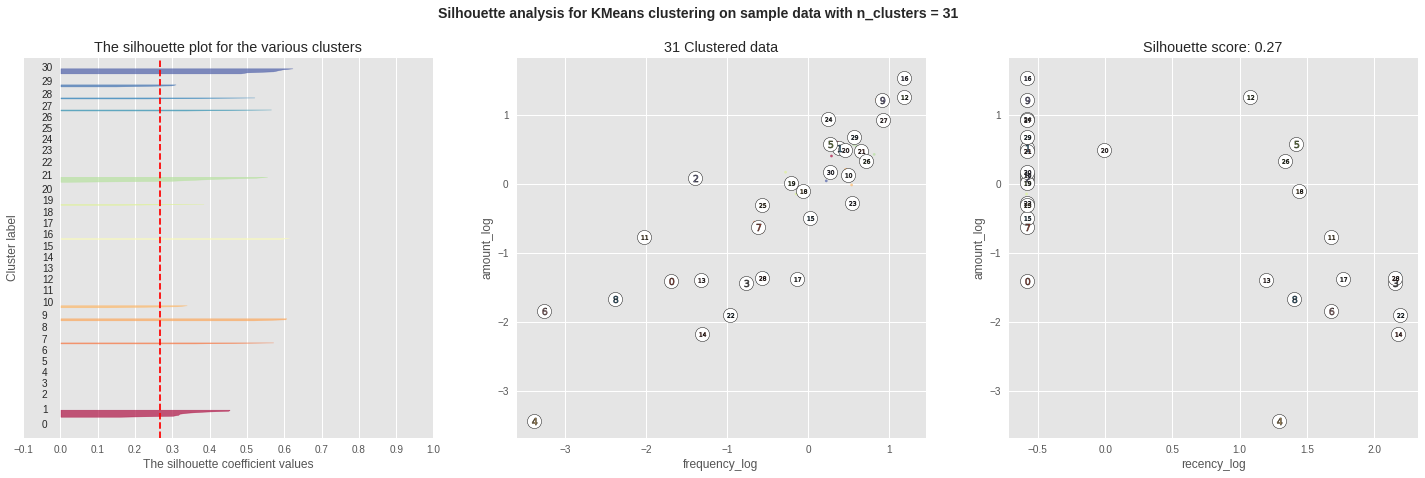

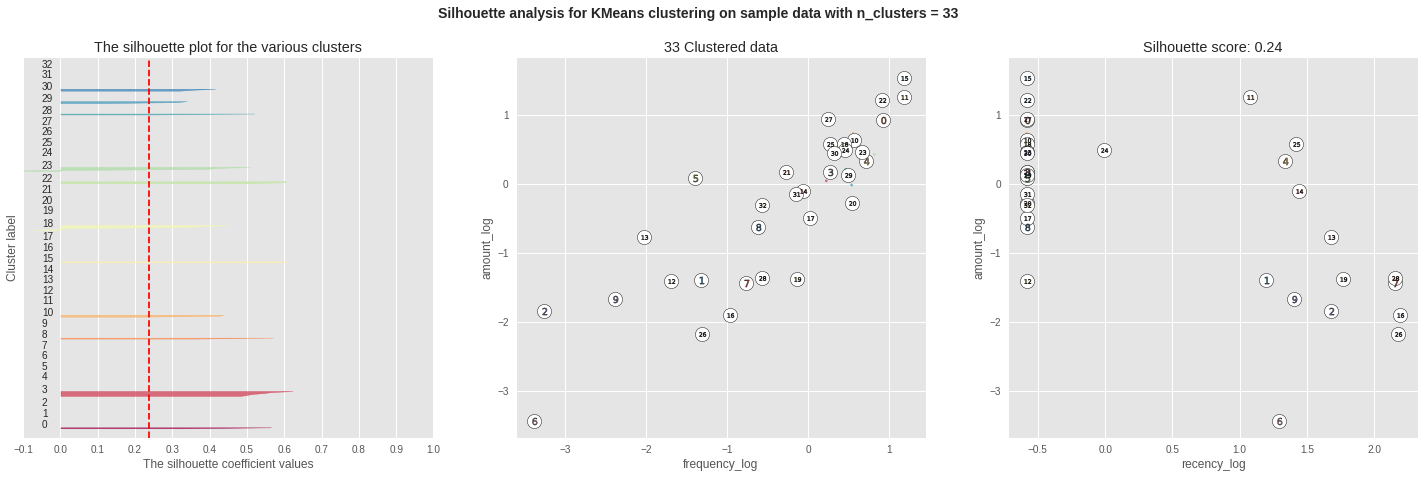

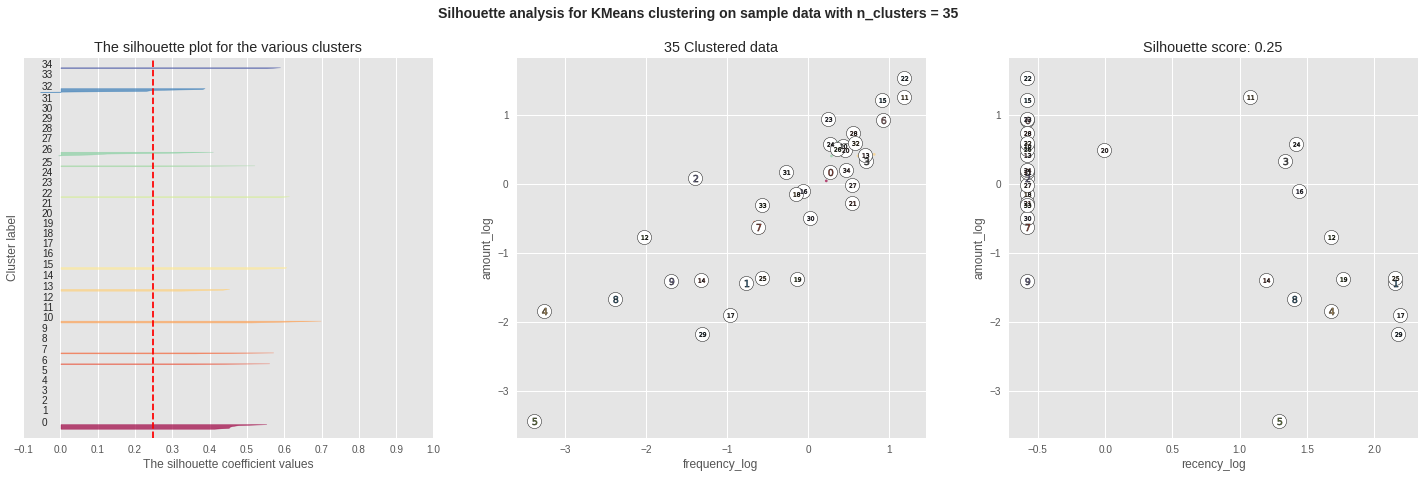

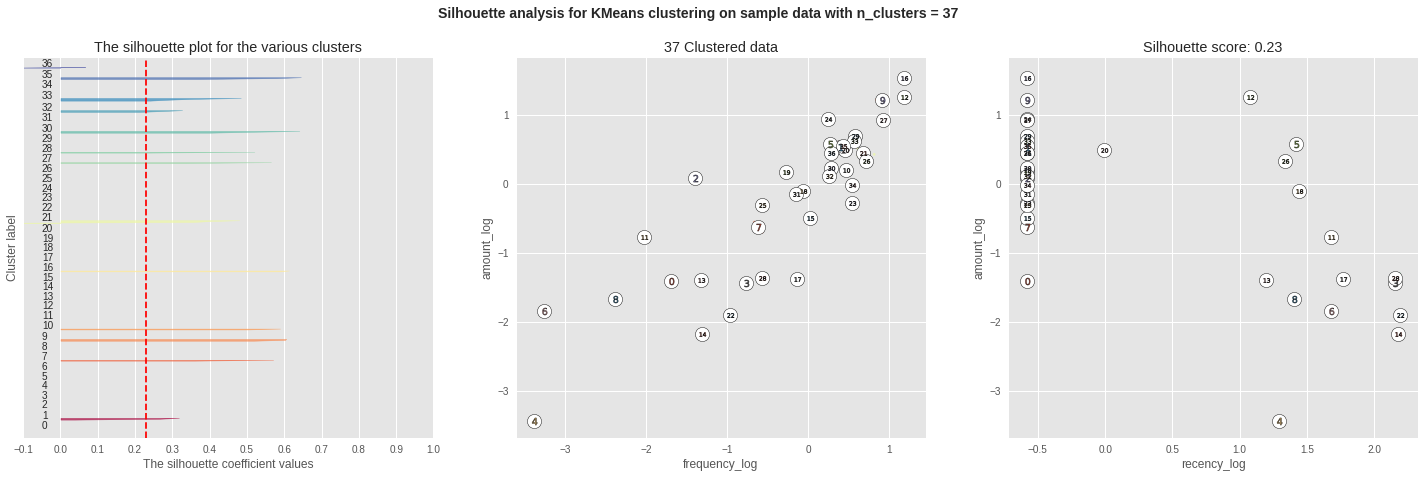

In [ ]:
# Please note I used the following code from sklearn documetation: 
# REFERENCE: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html 

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

#### First we notice that 50 clusters do not make any sense
###### When we look at the results of the clustering results, we can infer that 3, 5, 7 are valid K clusters, they have wide fluation in the size of the sihouette

In [ ]:
features = ['amount',  'recency',  'frequency', 'frequency_cat']
cl = [3, 5, 7]
for i in cl:
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.66
Centers of each cluster:
         amount      recency   frequency  frequency_cat
0  2.666821e+07  7621.789663    1.538372      59.018428
1  2.162822e+06  1819.455237  197.765735      40.648690
2  5.545341e+06   855.541934   15.491933       9.949874
--------------------------------------------------
for 5 clusters the silhouette score is 0.56
Centers of each cluster:
         amount      recency   frequency  frequency_cat
0  2.643522e+07  7567.589921    1.033558      59.167483
1  1.793490e+06   825.670228   40.896882      35.344869
2  5.545341e+06   855.541934   15.491933       9.949874
3  2.407079e+06  2857.711454  486.711417      44.029504
4  2.924217e+07  8214.863238  100.159299      57.475849
--------------------------------------------------
for 7 clusters the silhouette score is 0.52
Centers of each cluster:
         amount      recency   frequency  frequency_cat
0  3.084049e+07  8399.365817    1.039259      59.932167
1  2.711495e+06  25

,shop_id,recency,frequency,frequency_cat,amount,recency_log,frequency_log,amount_log,freq_cat_log,clusters_3,clusters_5,clusters_7
0,0,824.0,3600,48,3321672,6.714171,8.188689,15.015979,3.871201,1,3,1
1,2,824.0,2523,41,1620705,6.714171,7.833204,14.298372,3.713572,1,3,1
2,4,1.0,4341,58,19272408,0.000000,8.375860,16.774185,4.060443,0,0,5
3,6,1.0,4808,57,13220837,0.000000,8.478036,16.397305,4.043051,0,0,5
4,8,1.0,6773,60,18565514,0.000000,8.820699,16.736816,4.094345,0,0,0


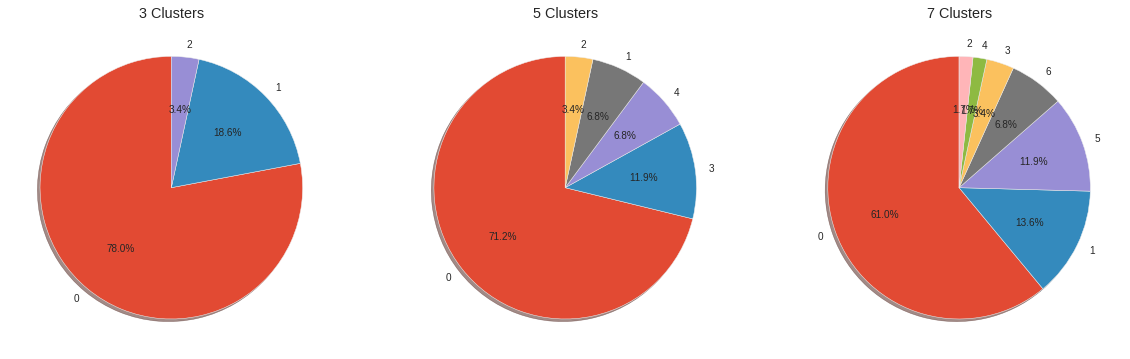

In [ ]:
store_history_df['clusters_3'] = cluster_centers[3]['labels'] 
store_history_df['clusters_5'] = cluster_centers[5]['labels']
store_history_df['clusters_7'] = cluster_centers[7]['labels']
display(store_history_df.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = store_history_df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')
f1 = fig.add_subplot(132)
market = store_history_df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
f1 = fig.add_subplot(133)
market = store_history_df.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
plt.show()

In [ ]:
x_data = ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(22, 80, 57, 0.5)', 'rgba(127, 65, 14, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
cutoff_quantile = 95

for n_clusters in range(3, 8, 2):
    cl = 'clusters_' + str(n_clusters)
    for fild in range(0, 4):
        field_to_plot = features[fild]        
        y_data = list()
        ymax = 0
        for i in np.arange(0,n_clusters):
            y0 = store_history_df[store_history_df[cl]==i][field_to_plot].values
            y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
            if ymax < max(y0, default=0): ymax = max(y0)
            y_data.insert(i, y0)

        traces = []

        for xd, yd, cls in zip(x_data[:n_clusters], y_data, colors[:n_clusters]):
                traces.append(go.Box(y=yd, name=xd, boxpoints=False, jitter=0.5, whiskerwidth=0.2, fillcolor=cls,
                    marker=dict( size=1, ),
                    line=dict(width=1),
                ))

        layout = go.Layout(
            title='Difference in {} with {} Clusters and {:1.2f} Score'.\
            format(field_to_plot, n_clusters, cluster_centers[n_clusters]['silhouette_score']),
            yaxis=dict( autorange=True, showgrid=True, zeroline=True,
                dtick = int(ymax/10),
                gridcolor='black', gridwidth=0.1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2, ),
            margin=dict(l=40, r=30, b=50, t=50, ),
            paper_bgcolor='white',
            plot_bgcolor='white',
            showlegend=False
        )

        fig = go.Figure(data=traces, layout=layout)
        py.offline.iplot(fig)

In [ ]:
# Lets save out table to excel file, only with (shop_id and cluster)
# we choose 5 cluster based on our silhouette analysis

store_history_df = store_history_df[['shop_id', 'clusters_5']]
store_history_df.head()

store_history_df.to_excel('Hector_Motsepe_ML_Challenges.xlsx')

In [ ]:
# Save pdf file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Shoprite_Machine_Learning.ipynb')

 # Clusters Insights


 ###### THREE CLUSTERS

*   The three clusters appear to have a good stack differences in the sales amount of the store. 
* The is a relatioship between frequecy, recency and monetary, which allows us to understand the different clusters
*   The cluster 0 has the highest sale amount, the stoores sell very frequently, however not soo recent. This clusters has the highest freq_category, meaning the stores sell items in different categories

*   The second cluster (1) it has the lowest amount in sales, however it is the highest in terms of recently. I think this type of stores are the one which sell very often, but do not make lot of money. (Stores located in township, people buy basic needs everyday such as bread, however the stores in mall, people buy groceries).  This clusters has high selling frequnecy, but not as high as cluster 0. this type of stores sell different product categories. 

*   The cluster 2, is very low, intem of sales amount, recency, selling frequency and selling frequecny of selling different categories. 

###### FIVE CLUSTERS
* Cluster 0, is what we call a perfect cluster. This stores bring money to shoprite. They have high sales amount. High selling frequently, meaning they sell product very frequntly. However not do not recence, This stores high in terms of different product categories.

* Cluster 1, has low sales amount compared to cluster 0, is the second good clusters in term is how recently is selling, it is not frequently selling compared to cluster 0, it is fairly sellling multiple product categories.

* Cluster 2, is very very low in every componets. We can try to investigate about this stores, and see why they are not making money

* Cluster 3, This stores have the highest selling recency, but low sales amount. they are the third best in terms of frequency and selling of categories

* Cluster 4, This stores are the second best in the group, they have high sales amount (Meaning they bring money to shoprite (NP)). They have fairly good recency in in terms of selling. They have high seeling frequency and are the second best in terms of selling multiple products in different categories. 













# **CHALLENGES** **AND** **PROBLEMS** **FACED**

1.   The dates on the datasets are incosistent, which could affect our results. Our model heavily depended on the date, to calaculate recency and frequecy of sales for store_ID
2.   The different results via k-means with distinct random initializations are definitely a problem. However, we useD k-means++ as an alternative, hwoever it was not computationally feasible, we could have ran the algorithm multiple times with different seeds and pick the one with e.g., lowest within cluster (sum of squared errors)
3. I did not use some of the columns such as product category, because it is some what correlated with item id
4. Choosing the good K (Hyperparameter) is really difficult, because we assume that the groups come in spherical or globular shapes, which is not the case with real world data.



# **Next** **Steps** **in** **the** **Store** **Segmentation** **and** **Recommendation**

*   To futher improve our store segmentation model, we need to add more relevent features, such as store location (This will allow us to segment stores based on location, some location have high sales due to population)
*   We need to create a online stream systems, whereby our model segment stores as sales happens, batches stream, would not inform the executives/managers in real time.

* Shoprite is using AWS cloud platform, we can deploy our model, by using Dockers and Kubernatives (Containers) and deploy our model with AWS  Sagemarker endpoint.

* Machine learning Engineers should be granted access to the company database, because using excel and other means to access data, could corrut the data. I was not able to see some columns when I opened the file with MS Excel, only after I opened with pandas.

* Model improvement with Deep Learning Based Clustering Techniques in the future




# **What** **does** **my** **insights** **mean** **to** **Shoprite**?

*   Suppose Shoprite want to launch a new store in a certian geographic area, The model can be able to classify the store, and predict if there will be a demand for  the ype of goods sold.
*   Shoprite can use the model to know which stores run out of store very quckly, and allocate necessary resources, such as trcuk delivery of stock. 
* Store segmentation model will help shoprite identify stores which are underperforming, and allow necessary measures to be taken. 


#### By Hector Motsepe
#### Masters of Information Technology (Artificial Intelligence Research)
#### contact_info: hectormotsepe@gmail.com
#### Copyrights Reserved 